In [38]:
! pip install html5lib
import requests 
import json 
import csv
import pandas as pd
from bs4 import BeautifulSoup
import html5lib


lat = "42.098701"
lon = "-75.912537"
genius=requests.get(f"https://api.weather.gov/points/{lat},{lon}")

json_file=genius.json()
json_file

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   's': 'https://schema.org/',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#',
   'geometry': {'@id': 's:GeoCoordinates', '@type': 'geo:wktLiteral'},
   'city': 's:addressLocality',
   'state': 's:addressRegion',
   'distance': {'@id': 's:Distance', '@type': 's:QuantitativeValue'},
   'bearing': {'@type': 's:QuantitativeValue'},
   'value': {'@id': 's:value'},
   'unitCode': {'@id': 's:unitCode', '@type': '@id'},
   'forecastOffice': {'@type': '@id'},
   'forecastGridData': {'@type': '@id'},
   'publicZone': {'@type': '@id'},
   'county': {'@type': '@id'}}],
 'id': 'https://api.weather.gov/points/42.0987,-75.9125',
 'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [-75.9125, 42.0987]},
 'properties': {'@id': 'https://api.weather.gov/p

In [39]:
forecast = json_file["properties"]["forecast"]
forecast1 = requests.get(forecast)

json=forecast1.json()
json

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#'}],
 'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-75.9315877, 42.1111321],
    [-75.9357021, 42.0895688],
    [-75.9066508, 42.0865146],
    [-75.90253039999999, 42.1080777],
    [-75.9315877, 42.1111321]]]},
 'properties': {'updated': '2023-03-21T02:21:30+00:00',
  'units': 'us',
  'forecastGenerator': 'BaselineForecastGenerator',
  'generatedAt': '2023-03-21T03:28:49+00:00',
  'updateTime': '2023-03-21T02:21:30+00:00',
  'validTimes': '2023-03-20T20:00:00+00:00/P7DT17H',
  'elevation': {'unitCode': 'wmoUnit:m', 'value': 274.0152},
  'periods': [{'number': 1,
    'name': 'Tonight',
    'startTime': '2023-03-20T23:00:00-04:00',
    'endTime': '2023-03-21T06:00:00-04:00',
    'i

In [40]:
weather = json["properties"]["periods"]
weather

[{'number': 1,
  'name': 'Tonight',
  'startTime': '2023-03-20T23:00:00-04:00',
  'endTime': '2023-03-21T06:00:00-04:00',
  'isDaytime': False,
  'temperature': 31,
  'temperatureUnit': 'F',
  'temperatureTrend': None,
  'probabilityOfPrecipitation': {'unitCode': 'wmoUnit:percent', 'value': 20},
  'dewpoint': {'unitCode': 'wmoUnit:degC', 'value': -6.666666666666667},
  'relativeHumidity': {'unitCode': 'wmoUnit:percent', 'value': 61},
  'windSpeed': '6 mph',
  'windDirection': 'S',
  'icon': 'https://api.weather.gov/icons/land/night/few/snow,20?size=medium',
  'shortForecast': 'Mostly Clear then Slight Chance Snow Showers',
  'detailedForecast': 'A slight chance of snow showers after 5am. Mostly clear, with a low around 31. South wind around 6 mph. Chance of precipitation is 20%.'},
 {'number': 2,
  'name': 'Tuesday',
  'startTime': '2023-03-21T06:00:00-04:00',
  'endTime': '2023-03-21T18:00:00-04:00',
  'isDaytime': True,
  'temperature': 55,
  'temperatureUnit': 'F',
  'temperatureTre

In [41]:
lab7_csv = open("forecast.csv", "w", newline="", encoding="utf-8")
csv_writer=csv.writer(lab7_csv)
csv_writer.writerow(['Day', 'Temp', 'Forecast'])

for i in weather:
    day = i["name"]
    temp = i["temperature"]
    detailed = i["detailedForecast"]
    
    csv_writer.writerow([day, temp, detailed])
    
lab7_csv.close()

view=pd.read_csv('forecast.csv')
view


,Day,Temp,Forecast
0,Tonight,31,A slight chance of snow showers after 5am. Mos...
1,Tuesday,55,A slight chance of snow showers before 7am. Mo...
2,Tuesday Night,33,"Mostly cloudy, with a low around 33. Southeast..."
3,Wednesday,56,A slight chance of rain showers after 2pm. Mos...
4,Wednesday Night,44,"A chance of rain showers. Mostly cloudy, with ..."
5,Thursday,60,"Rain showers likely. Cloudy, with a high near ..."
6,Thursday Night,38,"Rain showers likely. Cloudy, with a low around..."
7,Friday,47,"A chance of rain showers. Cloudy, with a high ..."
8,Friday Night,34,"A chance of rain before 1am, then a chance of ..."
9,Saturday,44,"Rain and snow likely. Mostly cloudy, with a hi..."


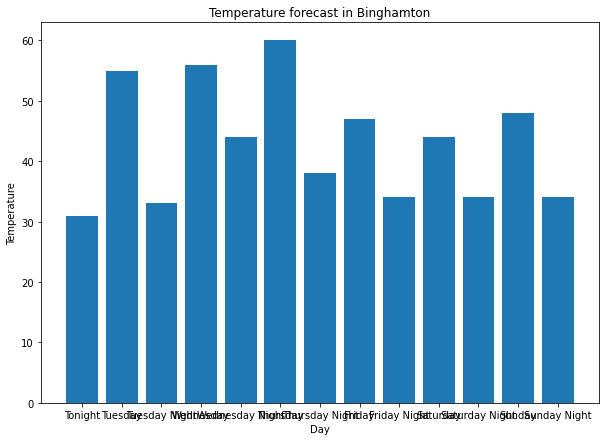

In [45]:
! pip install html5lib
import requests 
import json 
import csv
from bs4 import BeautifulSoup
import html5lib #reinstalled because i got error messages 
import pandas as pd
from matplotlib import pyplot as plt 
import numpy as np 

df=pd.DataFrame(view)

day=df["Day"]
temp=df["Temp"]

fig=plt.figure(figsize=(10,7))
plt.bar(day[0:13], temp[0:13])

plt.xlabel("Day")
plt.ylabel("Temperature")
plt.title("Temperature forecast in Binghamton")

plt.show()

In [23]:
countrycode= requests.get("https://date.nager.at/api/v3/CountryInfo/200")
json_file2=countrycode.json()
json_file2 #gives the official name, region, and borders 

availcountries= requests.get("https://date.nager.at/api/v3/AvailableCountries")
json_file3=availcountries.json()
json_file3 #gives all the possible countries available and the country code to put into the other calls 

longweekend= requests.get("https://date.nager.at/api/v3/LongWeekend/2010/CU")
json_file4=longweekend.json()
json_file4 #gives long weekends for a given country, after putting in the country code

publicholiday= requests.get("https://date.nager.at/api/v3/PublicHolidays/2000/cu")
json_file5=publicholiday.json()
json_file5 #gives the public holidays of a given country using the country code

todayholiday= requests.get("https://date.nager.at/api/v3/IsTodayPublicHoliday/cu?offset=0")
json_file6=todayholiday.json()
json_file6 #tells u if today is a public holiday in a given country 
#getting error because i didn't plug in the county code

upcomingholiday= requests.get("https://date.nager.at/api/v3/NextPublicHolidays/cu")
json_file7=upcomingholiday.json()
json_file7 #tells u if there are any upcoming holidays in a given country

weekholiday= requests.get("https://date.nager.at/api/v3/NextPublicHolidaysWorldwide")
json_file8=weekholiday.json()
json_file8 #tells u if there are any holidays in the next week


JSONDecodeError: [Errno Expecting value] : 0

In [25]:
#cuba
publicholiday= requests.get("https://date.nager.at/api/v3/PublicHolidays/2000/cu")
json_file5=publicholiday.json()
json_file5 #gives the public holidays of a given country using the country code

holiday_csv = open("holiday.csv", "w", newline="", encoding="utf-8")
csv_writer=csv.writer(holiday_csv)
csv_writer.writerow(['Holiday'])

for i in json_file5:
    holiday = i["localName"]
    
    csv_writer.writerow([holiday])
    
holiday_csv.close()

view=pd.read_csv('holiday.csv')
view #cuba 

#couldnt figure out how to make one program for all 10, but i figured out that 
#you can just change the country code in the url to get the same info for another country 

,Holiday
0,Triunfo de la Revolución
1,Día de Victoria de las Fuerzas Armadas
2,Good Friday
3,Día de los trabajadores
4,Conmemoración del asalto a Moncada
5,Día de la Rebeldía Nacional
6,Conmemoración del asalto a Moncada
7,Día de la Independencia
8,Navidad


In [26]:
#autrialia 
publicholiday= requests.get("https://date.nager.at/api/v3/PublicHolidays/2000/au")
json_file5=publicholiday.json()
json_file5 #gives the public holidays of a given country using the country code

holiday_csv = open("holiday.csv", "w", newline="", encoding="utf-8")
csv_writer=csv.writer(holiday_csv)
csv_writer.writerow(['Holiday'])

for i in json_file5:
    holiday = i["localName"]
    
    csv_writer.writerow([holiday])
    
holiday_csv.close()

view=pd.read_csv('holiday.csv')
view 

,Holiday
0,New Year's Day
1,Australia Day
2,Labour Day
3,Canberra Day
4,March Public Holiday
5,Eight Hours Day
6,Labour Day
7,Good Friday
8,Easter Eve
9,Easter Sunday


In [27]:
#barbados 
publicholiday= requests.get("https://date.nager.at/api/v3/PublicHolidays/2000/bb")
json_file5=publicholiday.json()
json_file5 #gives the public holidays of a given country using the country code

holiday_csv = open("holiday.csv", "w", newline="", encoding="utf-8")
csv_writer=csv.writer(holiday_csv)
csv_writer.writerow(['Holiday'])

for i in json_file5:
    holiday = i["localName"]
    
    csv_writer.writerow([holiday])
    
holiday_csv.close()

view=pd.read_csv('holiday.csv')
view 

,Holiday
0,New Year's Day
1,Errol Barrow Day
2,Good Friday
3,Easter Monday
4,National Heroes' Day
5,Labour Day
6,Whit Monday
7,Emancipation Day
8,Kadooment Day
9,Independence Day


In [28]:
#costa rica 
publicholiday= requests.get("https://date.nager.at/api/v3/PublicHolidays/2000/cr")
json_file5=publicholiday.json()
json_file5 #gives the public holidays of a given country using the country code

holiday_csv = open("holiday.csv", "w", newline="", encoding="utf-8")
csv_writer=csv.writer(holiday_csv)
csv_writer.writerow(['Holiday'])

for i in json_file5:
    holiday = i["localName"]
    
    csv_writer.writerow([holiday])
    
holiday_csv.close()

view=pd.read_csv('holiday.csv')
view 

,Holiday
0,Año Nuevo
1,Día de Juan Santamaría
2,Jueves Santo
3,Viernes Santo
4,Día Internacional del Trabajo
5,Anexión del Partido de Nicoya a Costa Rica
6,Fiesta de Nuestra Señora de los Ángeles
7,Día de la Madre
8,Día de la Independencia
9,Día de las Culturas


In [29]:
#germany 
#just realized that maybe an f string would allow you to change the country code?? 
#still unsure how to execute that though 
publicholiday= requests.get("https://date.nager.at/api/v3/PublicHolidays/2000/de")
json_file5=publicholiday.json()
json_file5 #gives the public holidays of a given country using the country code

holiday_csv = open("holiday.csv", "w", newline="", encoding="utf-8")
csv_writer=csv.writer(holiday_csv)
csv_writer.writerow(['Holiday'])

for i in json_file5:
    holiday = i["localName"]
    
    csv_writer.writerow([holiday])
    
holiday_csv.close()

view=pd.read_csv('holiday.csv')
view 



,Holiday
0,Neujahr
1,Heilige Drei Könige
2,Karfreitag
3,Ostersonntag
4,Ostermontag
5,Tag der Arbeit
6,Christi Himmelfahrt
7,Pfingstsonntag
8,Pfingstmontag
9,Fronleichnam


In [30]:
#6 ecuador 
publicholiday= requests.get("https://date.nager.at/api/v3/PublicHolidays/2000/ec")
json_file5=publicholiday.json()
json_file5 #gives the public holidays of a given country using the country code

holiday_csv = open("holiday.csv", "w", newline="", encoding="utf-8")
csv_writer=csv.writer(holiday_csv)
csv_writer.writerow(['Holiday'])

for i in json_file5:
    holiday = i["localName"]
    
    csv_writer.writerow([holiday])
    
holiday_csv.close()

view=pd.read_csv('holiday.csv')
view 

,Holiday
0,Año Nuevo
1,Carnaval
2,Carnaval
3,Good Friday
4,International Workers' Day
5,Batalla de Pichincha
6,Primer Grito de Independencia
7,Independencia de Guayaquil
8,"Día de los Difuntos, Día de Muertos"
9,Independencia de Cuenca


In [31]:
#7 egypt 
publicholiday= requests.get("https://date.nager.at/api/v3/PublicHolidays/2000/eg")
json_file5=publicholiday.json()
json_file5 #gives the public holidays of a given country using the country code

holiday_csv = open("holiday.csv", "w", newline="", encoding="utf-8")
csv_writer=csv.writer(holiday_csv)
csv_writer.writerow(['Holiday'])

for i in json_file5:
    holiday = i["localName"]
    
    csv_writer.writerow([holiday])
    
holiday_csv.close()

view=pd.read_csv('holiday.csv')
view 

,Holiday
0,عيد الميلاد المجيد
1,عيد الثورة 25 يناير
2,عيد تحرير سيناء
3,عيد العمال
4,عيد ثورة 23 يوليو
5,عيد القوات المسلحة


In [32]:
#8 united kingdom
publicholiday= requests.get("https://date.nager.at/api/v3/PublicHolidays/2000/gb")
json_file5=publicholiday.json()
json_file5 #gives the public holidays of a given country using the country code

holiday_csv = open("holiday.csv", "w", newline="", encoding="utf-8")
csv_writer=csv.writer(holiday_csv)
csv_writer.writerow(['Holiday'])

for i in json_file5:
    holiday = i["localName"]
    
    csv_writer.writerow([holiday])
    
holiday_csv.close()

view=pd.read_csv('holiday.csv')
view 

,Holiday
0,New Year's Day
1,New Year's Day
2,New Year's Day
3,New Year's Day
4,Saint Patrick's Day
5,Good Friday
6,Easter Monday
7,Early May Bank Holiday
8,Spring Bank Holiday
9,Battle of the Boyne


In [33]:
#9 greenland 
publicholiday= requests.get("https://date.nager.at/api/v3/PublicHolidays/2000/gl")
json_file5=publicholiday.json()
json_file5 #gives the public holidays of a given country using the country code

holiday_csv = open("holiday.csv", "w", newline="", encoding="utf-8")
csv_writer=csv.writer(holiday_csv)
csv_writer.writerow(['Holiday'])

for i in json_file5:
    holiday = i["localName"]
    
    csv_writer.writerow([holiday])
    
holiday_csv.close()

view=pd.read_csv('holiday.csv')
view 

,Holiday
0,Ukiortaaq
1,Kunngit pingasut ulluat
2,Sisamanngortoq illernartoq
3,Tallimanngorneq tannaartoq
4,Poorskip ullua
5,Poorskip-aappaa
6,Tussiarfik
7,Qilaliarfik
8,Atuanngiffik
9,Piinsi


In [34]:
#10 greece
publicholiday= requests.get("https://date.nager.at/api/v3/PublicHolidays/2000/gr")
json_file5=publicholiday.json()
json_file5 #gives the public holidays of a given country using the country code

holiday_csv = open("holiday.csv", "w", newline="", encoding="utf-8")
csv_writer=csv.writer(holiday_csv)
csv_writer.writerow(['Holiday'])

for i in json_file5:
    holiday = i["localName"]
    
    csv_writer.writerow([holiday])
    
holiday_csv.close()

view=pd.read_csv('holiday.csv')
view 

,Holiday
0,Πρωτοχρονιά
1,Θεοφάνεια
2,Καθαρά Δευτέρα
3,Ευαγγελισμός της Θεοτόκου
4,Εικοστή Πέμπτη Μαρτίου
5,Μεγάλη Παρασκευή
6,Κυριακή του Πάσχα
7,Δευτέρα του Πάσχα
8,Εργατική Πρωτομαγιά
9,Πεντηκοστή


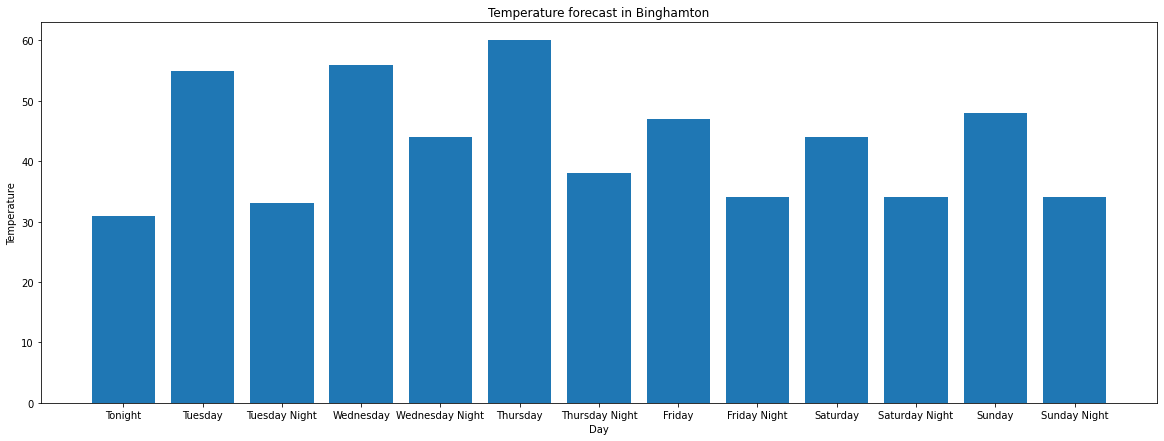

In [48]:
#bonus 


df=pd.DataFrame(view)

day=df["Day"]
temp=df["Temp"]

fig=plt.figure(figsize=(20,7)) #just changed the 10 to 20
plt.bar(day[0:13], temp[0:13]) #didnt use any sources, common sense 

plt.xlabel("Day")
plt.ylabel("Temperature")
plt.title("Temperature forecast in Binghamton")

plt.show()